In [1]:
%load_ext autoreload
%reload_ext autoreload
%autoreload 2

In [2]:
%matplotlib inline

from pathlib import Path

from attila.util.config import get_config
from attila.data.parse import parse_data, get_data
from attila.experiments.data import load_experiments
from attila.experiments.do import do_batch_experiments
from attila.util.plots import plot_sample

In [3]:
_here = Path('.').resolve()
config = get_config(_here / './config.ini')

data_path = _here / config.get('data', 'folder')
data_path = data_path.resolve()

out_path = Path(config.get('experiments', 'output folder')).resolve()
out_path.mkdir(parents=True, exist_ok=True)  # rm and mkdir if existing

images_path = data_path / config.get('data', 'images')
masks_path = data_path / config.get('data', 'masks')

In [4]:
raw = get_data(images_path, masks_path)
X, y = parse_data(
    raw,
    (config.getint('image', 'width'), config.getint('image', 'height'))
)

68

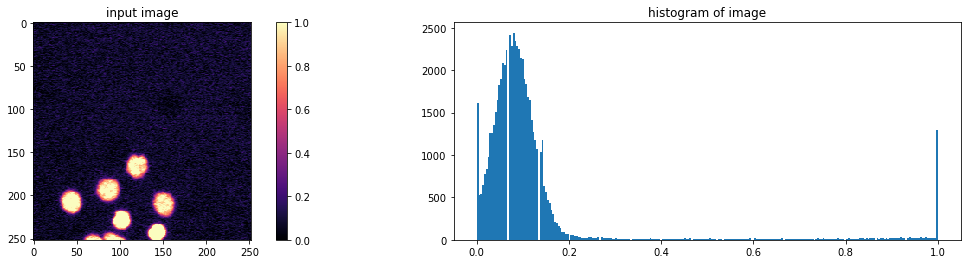

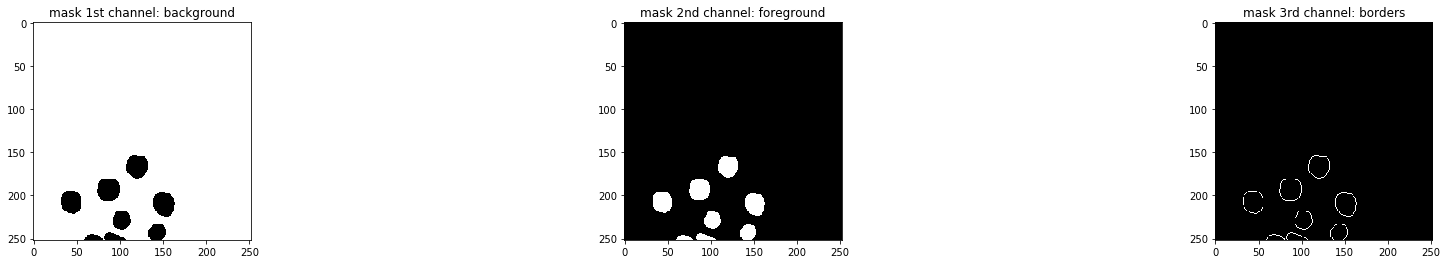

In [5]:
plot_sample(X, y)

In [6]:
experiments_file = _here / config.get('experiments', 'output file')
experiments = load_experiments(experiments_file)

In [13]:
do_batch_experiments(experiments, (X, y), config, out_path)

testing data: X ~ (28, 252, 252, 1), y ~ (28, 252, 252, 3)
ready to perform #1 / 2 batch of experiments
augmented training data: X ~ (216, 252, 252, 1), y ~ (216, 252, 252, 3)
ready to perform 8 experiments
=== experiment #1 / 8: with_same
= dataset training: X ~ (216, 252, 252, 1), y ~ (216, 252, 252, 3)
= dataset validation: X ~ (10, 252, 252, 1), y ~ (10, 252, 252, 3)
= dataset test (not used): X ~ (28, 252, 252, 1), y ~ (28, 252, 252, 3)
=== model
= # layers: 25
= # total params: 1882115
= # trainable params: 1882115
= # non-trainable params: 0
Epoch 1/2
54/54 [==============================] - ETA: 0s - loss: 0.1508 - accuracy: 0.9655 - batch_metric-mean_IoU: 0.4369 - batch_metric-mean_DSC: 0.3452
Epoch 00001: loss improved from inf to 0.15082, saving model to /home/h4/stfo194b/scratch/attila/out/run-0/with_same/model.h5
54/54 [==============================] - 3s 60ms/step - loss: 0.1508 - accuracy: 0.9655 - batch_metric-mean_IoU: 0.4369 - batch_metric-mean_DSC: 0.3452 - val_loss

KeyboardInterrupt: 

In [48]:
from attila.experiments.tools import create_tex_experiments

create_tex_experiments(experiments, config)

creating .tex table for 8 experiments configurations

with_same & \cmark{} & \xmark{} & same & 25 & 1881985 \\
without_same & \xmark{} & \xmark{} & same & 21 & 1697665 \\
with_valid & \cmark{} & \xmark{} & valid & 25 & 1881985 \\
without_valid & \xmark{} & \xmark{} & valid & 21 & 1697665 \\
with_same_se & \cmark{} & \cmark{} & same & 53 & 1897857 \\
without_same_se & \xmark{} & \cmark{} & same & 49 & 1713537 \\
with_valid_se & \cmark{} & \cmark{} & valid & 53 & 1897857 \\
without_valid_se & \xmark{} & \cmark{} & valid & 49 & 1713537 \\

creating .tex table for 8 experiments results

with_same & 0.937 (-1.4 \%) & \textbf{0.656} \\
without_same & 0.914 (-3.9 \%) & 0.654 (-0.3 \%) \\
with_valid & 0.933 (-1.9 \%) & 0.650 (-0.9 \%) \\
without_valid & \textbf{0.951} & 0.647 (-1.4 \%) \\
with_same_se & 0.907 (-4.6 \%) & 0.646 (-1.5 \%) \\
without_same_se & 0.824 (-13.3 \%) & 0.617 (-5.9 \%) \\
with_valid_se & 0.917 (-3.6 \%) & 0.642 (-2.2 \%) \\
without_valid_se & 0.910 (-4.3 \%) & 0.635 (-3.

In [10]:
import numpy as np
from tensorflow.keras import backend as K

y_true = np.array([
  [0, 0, 1, 0, 0],
  [0, 1, 1, 1, 0],
  [0, 1, 1, 1, 0],
  [0, 1, 1, 1, 0],
  [0, 0, 1, 0, 0],
])

y_pred = np.array([
  [0, 0, 0, 0, 0],
  [1, 1, 1, 1, 0],
  [1, 1, 1, 1, 0],
  [1, 1, 1, 1, 0],
  [0, 0, 1, 0, 0],
])

In [19]:
def eps_divide(n, d, eps=K.epsilon()):
    """ perform division using eps """
    
    return (n + eps) / (d + eps)


def iou(y_true, y_pred):
    """
    - y_true is a 2D array representing the ground truth BINARY image
    - y_pred is a 2D array representing the predicted BINARY image
    """

    inter = np.sum(y_true * y_pred)
    union = np.sum(y_true + y_pred) - inter
    return eps_divide(inter, union)
  

iou(y_true, y_pred)

0.7142857163265306